In [ ]:
import numpy as np
import pandas as pd
from sklearn.utils.multiclass import unique_labels
import os
from sklearn import metrics
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras_preprocessing.image import ImageDataGenerator, img_to_array, load_img
import seaborn as sns
from keras import applications
import itertools
import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from keras import Sequential
from keras import applications
from keras.applications import VGG19 #For Transfer Learning
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.optimizers import SGD,Adam
from keras.callbacks import ReduceLROnPlateau
from keras.layers import Flatten,Dense,BatchNormalization,Activation,Dropout
from keras.utils import to_categorical
import math
import datetime
import time
import os

# import pertinent libraries
import os
import sys
import datetime
import glob as glob
import numpy as np
import cv2
# [Keras Models]
# import the Keras implementations of VGG16, VGG19, InceptionV3 and Xception models
# the model used here is VGG16
from keras.applications.vgg16 import VGG16, preprocess_input,decode_predictions
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D
from keras_preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.optimizers import SGD
import tensorflow
from scipy.interpolate import UnivariateSpline
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
import os
import cv2
from PIL import Image
import tensorflow as tf
from keras import backend as K
from keras.models import load_model
from keras_preprocessing.image import img_to_array
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import PIL
from PIL import Image

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pip install split-folders --quiet

In [ ]:
import splitfolders
splitfolders.ratio("/content/drive/MyDrive/Project/Danger Of Extinction",output='Splitted',ratio=(0.8,0.1,0.1))

Copying files: 6700 files [00:36, 181.93 files/s]


In [ ]:
# [Dataset]
# image dimensions for VGG16, VGG19 are 224, 224
# image dimensions for InceptionV3 and Xception are 299, 299
img_width, img_height = 224, 224
train_dir = "./Splitted/train"
validate_dir = "./Splitted/val"
test_dir = "./Splitted/test"
nb_epochs = 10
batch_size = 32
nb_classes = len(glob.glob(train_dir + '/*'))

# get number of images in training directory
nb_train_samples = 0
for r, dirs, files in os.walk(train_dir):
    for dr in dirs:
        nb_train_samples += len(glob.glob(os.path.join(r, dr + "/*")))
# get number of images in validation directory
nb_validate_samples = 0
for r, dirs, files in os.walk(validate_dir):
    for dr in dirs:
        nb_validate_samples += len(glob.glob(os.path.join(r, dr + "/*")))

<h1>Pre-Trained Model: VGG16

In [ ]:
model = VGG16(include_top=True, weights='imagenet')

In [ ]:
input_shape = model.layers[0].output_shape[0][1:3]
input_shape

(224, 224)

In [ ]:
datagen_train = ImageDataGenerator(
      rescale=1./255,
      rotation_range=180,
      width_shift_range=0.1,
      height_shift_range=0.1,
      shear_range=0.1,
      zoom_range=[0.9, 1.5],
      horizontal_flip=True,
      vertical_flip=True,
      fill_mode='nearest')

In [ ]:
datagen_test = ImageDataGenerator(rescale=1./255)

In [ ]:
batch_size = 20

In [ ]:
if True:
    save_to_dir = None
else:
    save_to_dir='augmented_images/'

In [ ]:
# data pre-processing for training
train_datagen =  ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    fill_mode = 'nearest',
    horizontal_flip = True)

# data pre-processing for validation
validate_datagen =  ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    fill_mode = 'nearest',
    horizontal_flip = True)

In [ ]:
# generate and store training data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (img_width, img_height),
    batch_size = batch_size)

Found 5349 images belonging to 21 classes.


In [ ]:
test_generator = datagen_test.flow_from_directory(directory=test_dir,
                                                  target_size=input_shape,
                                                  batch_size=batch_size,
                                                  shuffle=False)

Found 681 images belonging to 21 classes.


In [ ]:
validate_generator = validate_datagen.flow_from_directory(
    validate_dir,
    target_size = (img_width, img_height),
    batch_size = batch_size)

Found 663 images belonging to 21 classes.


In [ ]:
steps_test = generator_test.n / batch_size
steps_test

34.05

In [ ]:
image_paths_train = os.path.join(train_dir, *train_generator.filenames)
image_paths_test = os.path.join(test_dir, *test_generator.filenames)

In [ ]:
cls_train = train_generator.classes
cls_test = test_generator.classes

In [ ]:
class_names = list(train_generator.class_indices.keys())
class_names

['African Golden Cat',
 'African_Elephant',
 'Amur_Leopard',
 'Arctic_Fox',
 'Black Footed Cat',
 'Cavalier King Charles Spaniel',
 'Chimpanzee',
 'Chinese Mountain Cat',
 'Irish Water Spaniel',
 'Jaguars',
 'Lion',
 'Marbled Cat',
 'Orangutan',
 'Otterhound',
 'Pampas Cat',
 'Panda',
 'Panthers',
 'Rhino',
 'Scottish Deerhound',
 'Sussex Spaniel',
 'cheetahs']

In [ ]:
num_classes = train_generator.num_classes
num_classes

21

<h2>Class Weights

In [ ]:
from sklearn.utils.class_weight import compute_class_weight

In [ ]:
class_weight = compute_class_weight(class_weight='balanced',
                                    classes=np.unique(cls_train),
                                    y=cls_train)

In [ ]:
class_weight

array([15.91964286,  0.67743161,  0.60074124,  0.86343826, 15.91964286,
       15.91964286,  0.69028262, 15.91964286, 15.91964286,  0.55252557,
        0.39551908, 15.91964286,  0.64321789, 15.91964286, 14.15079365,
        0.37679628,  0.56352718,  0.41215904, 14.15079365, 14.15079365,
        0.53964891])

<h2>Example Predictions

In [ ]:
def predict(image_path):
    # Load and resize the image using PIL.
    img = PIL.Image.open(image_path)
    img_resized = img.resize(input_shape, PIL.Image.LANCZOS)

    # Plot the image.
    plt.imshow(img_resized)
    plt.show()

    # Convert the PIL image to a numpy-array with the proper shape.
    img_array = np.expand_dims(np.array(img_resized), axis=0)

    # Use the VGG16 model to make a prediction.
    # This outputs an array with 1000 numbers corresponding to
    # the classes of the ImageNet-dataset.
    pred = model.predict(img_array)

    # Decode the output of the VGG16 model.
    pred_decoded = decode_predictions(pred)[0]


    # Print the predictions.
    for code, name, score in pred_decoded:
        print("{0:>6.2%} : {1}".format(score, name))

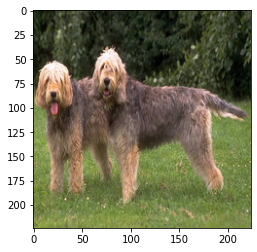

1/1 [==============================] - 2s 2s/step
98.60% : otterhound
 0.68% : Irish_wolfhound
 0.29% : Afghan_hound
 0.17% : soft-coated_wheaten_terrier
 0.16% : briard


In [ ]:
predict(image_path='/content/drive/MyDrive/Project/otterhound.jpg')

<h1>Transfer Learning

In [ ]:
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
transfer_layer = model.get_layer('block5_pool')

In [ ]:
transfer_layer.output

<KerasTensor: shape=(None, 7, 7, 512) dtype=float32 (created by layer 'block5_pool')>

In [ ]:
conv_model = Model(inputs=model.input,
                   outputs=transfer_layer.output)

In [ ]:
# Start a new Keras Sequential model.
new_model = Sequential()

# Add the convolutional part of the VGG16 model from above.
new_model.add(conv_model)

# Flatten the output of the VGG16 model because it is from a
# convolutional layer.
new_model.add(Flatten())

# Add a dense (aka. fully-connected) layer.
# This is for combining features that the VGG16 model has
# recognized in the image.
new_model.add(Dense(1024, activation='relu'))

# Add a dropout-layer which may prevent overfitting and
# improve generalization ability to unseen data e.g. the test-set.
new_model.add(Dropout(0.5))

# Add the final layer for the actual classification.
new_model.add(Dense(num_classes, activation='softmax'))

In [ ]:
optimizer = Adam(lr=1e-5)
loss = 'categorical_crossentropy'
metrics = ['categorical_accuracy']

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
def print_layer_trainable():
    for layer in conv_model.layers:
        print("{0}:\t{1}".format(layer.trainable, layer.name))

In [ ]:
conv_model.trainable = False
for layer in conv_model.layers:
    layer.trainable = False

In [ ]:
new_model.compile(optimizer = 'rmsprop',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy'])

In [ ]:
# fit the model, log the results and the training time
now = datetime.datetime.now
t = now()

new_model.fit(
    train_generator,
    epochs = nb_epochs,
    steps_per_epoch = 10,
    validation_data = validate_generator,
    validation_steps = nb_validate_samples,
    class_weight=None)
print('Training time: %s' % (now() - t))

Epoch 1/10
10/10 [==============================] - ETA: 0s - loss: 23.4632 - accuracy: 0.1450 

10/10 [==============================] - 519s 55s/step - loss: 23.4632 - accuracy: 0.1450 - val_loss: 6.5974 - val_accuracy: 0.1780
Epoch 2/10
10/10 [==============================] - 144s 15s/step - loss: 9.7238 - accuracy: 0.1100
Epoch 3/10
10/10 [==============================] - 112s 11s/step - loss: 4.1195 - accuracy: 0.1700
Epoch 4/10
10/10 [==============================] - 110s 11s/step - loss: 3.0158 - accuracy: 0.1700
Epoch 5/10
10/10 [==============================] - 110s 11s/step - loss: 2.7749 - accuracy: 0.1900
Epoch 6/10
10/10 [==============================] - 114s 11s/step - loss: 2.6854 - accuracy: 0.1600
Epoch 7/10
10/10 [==============================] - 104s 10s/step - loss: 2.4240 - accuracy: 0.2222
Epoch 8/10
10/10 [==============================] - 109s 11s/step - loss: 2.3451 - accuracy: 0.2100
Epoch 9/10
10/10 [==============================] - 110s 11s/step - loss: 2.3460 - accuracy: 0.2550
Epoch 10/10
10/10 [==============================] - 110s 11s/step -

In [ ]:
score = new_model.evaluate_generator(validate_generator, nb_validate_samples/batch_size)
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

<ipython-input-156-c07b50e03186>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  score = new_model.evaluate_generator(validate_generator, nb_validate_samples/batch_size)


Test Score: 2.0684475898742676
Test Accuracy: 0.2850678861141205


In [ ]:
from scipy import interpolate
from scipy.interpolate import UnivariateSpline

<h1>Fine Tuning

In [ ]:
for layer in model.layers:
    layer.trainable = True

# Step 2 - Compile the revised model using SGD optimizer with a learing rate of 0.0001 and a momentum of 0.9
model.compile(optimizer = SGD(lr = 0.0001, momentum=0.9),
    loss = 'categorical_crossentropy',
    metrics = ['accuracy'])

# Step 3 - Fit the revised model, log the results and the training time
now = datetime.datetime.now
t = now()

new_model.fit(
    train_generator,
    epochs = nb_epochs,
    steps_per_epoch = 10,
    validation_data = validate_generator,
    validation_steps = nb_validate_samples,
    class_weight=None)
print('Training time: %s' % (now() - t))

Epoch 1/10


In [ ]:
# evaluate the performance the new model and report the results
score = model.evaluate_generator(validate_generator, nb_validate_samples/batch_size)
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

In [ ]:
num_images = len(glob.glob("/content/drive/MyDrive/Project/download.jpg"))
predict_files = glob.glob("/content/drive/MyDrive/Project/download.jpg")

im = cv2.imread(predict_files[0])
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
im = cv2.resize(im, (256, 256)).astype(np.float32)
im = np.expand_dims(im, axis = 0)/255

predictor, image_id = [], []
for i in predict_files:
    im = cv2.imread(i)
    im = cv2.resize(cv2.cvtColor(im, cv2.COLOR_BGR2RGB), (256, 256)).astype(np.float32) / 255.0
    im = np.expand_dims(im, axis =0)
    outcome = [np.argmax(model.predict(im))]
    predictor.extend(list(outcome))
    image_id.extend([i.rsplit("\\")[-1]])

final = pd.DataFrame()
final["id"] = image_id
final["Cheetah"] = predictor

classes = train_generator.class_indices
classes = {value : key for key, value in classes.items()}

final["Cheetah"] = final["Cheetah"].apply(lambda x: classes[x])
final.head(num_images)